In [58]:
import pickle
import pandas as pd
import numpy as np
import os
import glob
from tqdm import tqdm
from scipy.spatial import distance_matrix
import json
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [59]:
tree_json_path = '/Users/krystal/Desktop/project/tree_yzx.json'
with open(tree_json_path, 'r') as file:
    tree_json = json.load(file)

In [2]:
## region boundary
region_table = pd.read_excel("/Users/krystal/Desktop/project/cloud_paper/CCFv3 Summary Structures.xlsx")
region_table

,order,structure ID,full structure name,abbreviation,parent_id,depth in tree,structure_id_path,total_voxel_counts (10 um)
0,6,184,"Frontal pole, cerebral cortex",FRP,315,6,/997/8/567/688/695/315/184/,973876
1,18,985,Primary motor area,MOp,500,7,/997/8/567/688/695/315/500/985/,11351334
2,24,993,Secondary motor area,MOs,500,7,/997/8/567/688/695/315/500/993/,13099028
3,44,353,"Primary somatosensory area, nose",SSp-n,322,8,/997/8/567/688/695/315/453/322/353/,3019080
4,51,329,"Primary somatosensory area, barrel field",SSp-bfd,322,8,/997/8/567/688/695/315/453/322/329/,6287780
...,...,...,...,...,...,...,...,...
311,1097,989,Fastigial nucleus,FN,519,4,/997/8/512/519/989/,502036
312,1098,91,Interposed nucleus,IP,519,4,/997/8/512/519/91/,859874
313,1099,846,Dentate nucleus,DN,519,4,/997/8/512/519/846/,334984
314,1100,589508455,Vestibulocerebellar nucleus,VeCB,519,4,/997/8/512/519/589508455/,85146


In [3]:
### CCFv3 stat
region_table_stat = pd.read_csv('region_match_table.csv')

In [5]:
region_table_stat.columns

Index(['sub_region', 'rough_region'], dtype='object')

In [12]:
len(region_table_stat[region_table_stat['rough_region']=='HB'])

70

In [103]:
region_List = np.unique(region_table['abbreviation'])
region_List2 = list(set(region_List) - set(['MDRN','fiber tracts']))
len(region_List2)

314

In [60]:
brain_to_id = {}
brain_id_path = {}
R_brain = ['TH','CTX','CNU','HY','CB','MB','HB','fiber tracts']
R_brain_id = [0 for i in range(len(R_brain))]
for i in range(len(tree_json)):
    bid = tree_json[i]['id']
    acronym = tree_json[i]['acronym']
    p = tree_json[i]['structure_id_path']
    if bid not in brain_to_id:
        brain_to_id[bid] = acronym
    if bid not in brain_id_path:
        brain_id_path[bid] = p
    if acronym in R_brain:
        matched_id = R_brain.index(acronym)
        R_brain_id[matched_id] = bid       

In [233]:
sub_region = []
rough_region = []
for k,v in brain_to_id.items():
    if v in region_List2:
        path_list = brain_id_path[k]
        sub_region.append(v)
        tmp_r = 'nan'
        for j in range(len(R_brain_id)):
            if R_brain_id[j] in path_list:
                tmp_r = R_brain[j]
        rough_region.append(tmp_r)

In [234]:
R_category_table = pd.DataFrame({'sub_region':sub_region,'rough_region':rough_region})
R_category_table.to_csv('region_match_table.csv',index=None)

In [6]:
## Brain region categorization
TH=['AD','AM','AV','CL','CM','IAD','LD','LGd','LHA','LP','MD','MG','MM','PCN','PF','PIL','PO','POL','PR','PVT',
   'PoT','RE','RT','SGN','SMT','TH','VAL','VM','LGv','IMD','PT','SPA','SPFp','LH','MH','SPFm','PP','RH','IGL','IntG',
   'VPL','VPLpc','VPM','VPMpc','SubG','AMd','Xi','IAM']
CTX=['ACAd','ACAv','AId','AIp','AIv','AON','AON','AUDd','AUDpo','AUDv','BLA','BMA','CA1','CA3','CLA','COAp','HPF','DG',
    'ECT','ENTl','ENTm','EPd','FRP','GU','IG','ILA','MOB','MOp','MOs','ORBl','ORBm','ORBvl','PIR','PL','POST','PRoS',
    'RSPagl','RSPd','RSPv','SSs','SUB','TEa','TR','VISC','VISa','VISal','VISam','VISl','VISli','VISp','VISpm',
    'VISpor','VISrl','VISpl','PAR','SSp','SSp-bfd','SSp-ll','SSp-m','SSp-n','SSp-tr','SSp-ul','SSp-un','AOB','APr',
    'DP','AUDp','TT','ProS','LA','PERI','NLOT','COAa','CA2','HATA','EPv','DG-sg','DG-mo','DG-po','ENTm6',
    'BMAa','COApl','BMAp','ENTl2','ENTl1','OLF','ENTm3','PRE','PAA','PA']
## CTXsp: PA
CNU=['ACB','BST','CEA','CP','FS','GPe','GPi','LSr','LSv','OT','PAL','SI','MEA','MS','LSc','AAA','MA','NDB',
    'TRS','SF','IA','SH','BA']
## PAL: TRS
## STR: SF,IA,SH,BA
HY=['AHN','DMH','HY','PH','PSTN','PVH','PVi','PeF','SBPV','TU','VMH','ZI','SUM','STN','MMd','MMme','MMl',
   'ARH','PMv','PVp','TMv','LM','LPO','PS','MPN','MPO','MEPO','ADP','PMd','AVPV','SCH',
   'PVpo','PVHd','VLPO','VMPO','ME','RCH','PVa','SO']
CB=['CENT','COPY','CUL','DEC','FL','FN','FOTU','NOD','PFL','AN','PRM','PYR','SIM','SIM','CENT3','CUL4, 5','CENT2',
   'ANcr2','ANcr1','UVU','LING','IP','VeCB','DN']
## CBX: UVU,LING
## CBN:IP,VeCB,DN
MB=['DR','IC','MB','MRN','MV','MY','PAG','RN','SNc','SCm','APN','PPN','RR','SNr','SAG','SCs','VTN','NOT','NB','AT',
   'CUN','PPT','MPT','VTA','CLI','NPC','IPN','IF','SCO','PN','ICe','LT','OP','PBG','EW',
   'MA3','RL','MT','III','DT']
HB=['IRN','LRN','MDRNd','MDRNv','P','PARN','PB','PG','PGRNl','PRNc','PRNr','PSV','SPIV','SPVC','SPVO','SUV','TRN',
   'V','VCO','NLL','CS','RPO','PCG','LDT','PCG','DTN','SPVI','LRNm','NI','KF','IO','RPA',
   'MARN','SOC','GRN','VII','PPY','AMB','LIN','RM','NTB','NR','XII','NTS','PGRNd','CU','P5',
   'GR','DMX','Pa5','AP','PAS','x','ECU','LAV','LC','I5','DCO','RO','SLD','PRP','SUT','ISN',
   'PC5','VI','B']
## MY:IO,RPA,MARN,GRN,VII,PPY,AMB,x,ECU,LIN,RM,LAV,NTB,NR,XII,NTS,PGRNd,CU,GR,DMX,Pa5,AP,PAS,
## DCO,RO,PRP,ISN,VI
## P:SOC,P5,LC,I5,SLD,SUT,PC5,B
fiber=['fi','dhc','fr','fp','alv','cing','sm','mtt','pm','nst','or','fa','ccg','arb','mlf','ll','fx','int',
      'ccb','mfb','tspc','arb','ml','scwm','fiber tracts']
unknown=['unknown']
error=['error']

In [2]:
region_matched_table = pd.read_csv('region_match_table.csv')

In [3]:
R_brain2 = ['TH','CTX','CNU','HY','CB','MB','HB']
for i in R_brain2:
    rows = region_matched_table[region_matched_table['rough_region']==i]
    name_tmp = i
    sub_list_tmp = list(rows['sub_region'])
    exec(f'{name_tmp} = {sub_list_tmp}')

In [13]:
fiber=['fiber tracts']
unknown=['unknown']
error=['error']

## 25scale

In [97]:
input_dir = '179k_registered/*'
folders = glob.glob(input_dir)
file_list = []
for folder in folders:
    files = glob.glob(folder+"/*")
    for f in files:
        file_list.append(f)

In [13]:
output_dir = '179k_registered_25scale'

In [24]:
for f in file_list:
    swc = pd.read_csv(f,sep=' ',comment='#',header=None)
    swc.columns = ['#n','type','x','y','z','radius','parent']
    swc.x=swc.x*25
    swc.y=swc.y*25
    swc.z=swc.z*25
    file_name = os.path.basename(f)
    brain_folder = os.path.join(output_dir,f.split("/")[1])
    if os.path.exists(brain_folder) == False:
        os.mkdir(brain_folder)
    out = os.path.join(brain_folder,file_name)
    swc.to_csv(out,sep =' ',index=None)

In [98]:
## soma retype
input_dir = '179k_registered_25scale/*'
folders = glob.glob(input_dir)
file_list = []
for folder in folders:
    files = glob.glob(folder+"/*")
    for f in files:
        file_list.append(f)

In [99]:
output_dir = '179k_reg_soma_retype'

In [102]:
for f in file_list:
    file_name = os.path.basename(f)
    brain_folder = os.path.join(output_dir,f.split("/")[1])
    if os.path.exists(brain_folder) == False:
        os.mkdir(brain_folder)
        
    swc = pd.read_csv(f,sep=' ',comment='#',header=None)
    swc.columns = ['#n','type','x','y','z','radius','parent']
    soma_row = swc[swc['parent']==-1]
    if len(soma_row) > 1:
        print(file_name)
        continue
    soma_index = swc[swc['parent']==-1].index[0]
    swc.at[soma_index,'type'] = 1    
    out = os.path.join(brain_folder,file_name)
    swc.to_csv(out,sep =' ',index=None)

## 1876 feature statistics

In [5]:
## 256 block
gf_table = pd.read_csv('gf_1876_crop.csv')

In [195]:
del_list = ['pre_17543_01171', 'pre_18458_00150', '18454_00008', 'pre_17543_01139', 'pre_17543_01241', 
            '18458_00048', 'pre_17543_01274', 'pre_17543_01276', 'pre_17543_01053', 'pre_17543_01090',
           'pre_18455_00109','17302_00087','18465_00205','18453_3147_x16721_y20510','18453_3218_x16785_y20581']

In [342]:
#gf_table.to_csv('gf_1876_crop.csv',index=None)

In [11]:
celltype_table_path = "1876_soma_region.csv"
celltype_table = pd.read_csv(celltype_table_path)

In [343]:
#celltype_table.to_csv('1876_soma_region.csv',index=None)

In [360]:
celltype_table = celltype_table.reset_index(drop=True)
gf_table = gf_table.reset_index(drop=True)

In [13]:
rough_type = []
for i in list(gf_table['Name']):
    name = i
    if name.split("_")[0] == '210254':
        name=name.replace("210254","15257")
    ctype_id = celltype_table[celltype_table['Name']==str(name)].index[0]
    ctype = celltype_table.iloc[ctype_id]['soma_region']
    if ctype in TH:
        rough_type.append('TH')
    elif ctype in CTX:
        rough_type.append('CTX')
    elif ctype in CNU:
        rough_type.append('CNU')
    elif ctype in HY:
        rough_type.append('HY')
    elif ctype in CB:
        rough_type.append('CB')
    elif ctype in MB:
        rough_type.append('MB')
    elif ctype in HB:
        rough_type.append('HB')
    elif ctype in fiber:
        rough_type.append('fiber')
    else:
        rough_type.append('unknown')

In [14]:
rough_type = np.array(rough_type)

In [71]:
np.unique(rough_type)

array(['CNU', 'CTX', 'HB', 'TH', 'unknown'], dtype='<U7')

In [92]:
gf_table[rough_type == 'unknown']

,Name,Nodes,SomaSurface,Stems,Bifurcations,Branches,Tips,OverallWidth,OverallHeight,OverallDepth,...,Volume,MaxEuclideanDistance,MaxPathDistance,MaxBranchOrder,AverageContraction,AverageFragmentation,AverageParent-daughterRatio,AverageBifurcationAngleLocal,AverageBifurcationAngleRemote,HausdorffDimension
252,17781_3668_x9453_y17266,2557,12.5664,7,27,59,33,189.275,194.950,178.1,...,8509.99,99.9919,400.860,6,0.889613,42.322,1,79.1811,69.2317,1.03966
1456,18867_6452_x16339_y18318,606,12.5664,4,4,10,7,144.525,152.925,181.4,...,2267.62,99.9765,162.447,3,0.880820,59.500,1,121.2850,88.5485,1.01679


In [94]:
celltype_table[celltype_table['Name']=='17781_3668_x9453_y17266']

,Name,soma_region
1184,17781_3668_x9453_y17266,SSp


In [107]:
rough_type[252] = 'CTX'

In [105]:
celltype_table[celltype_table['Name']=='18867_6452_x16339_y18318']

,Name,soma_region
1841,18867_6452_x16339_y18318,BS


In [108]:
type_category = ['TH','CTX','CNU','HY','CB','MB','HB','fiber','unknown']
features = ['Nodes','Length','Bifurcations']
type_involved = ['TH','CTX','CNU','HB']
criteria_table = np.zeros((len(type_involved),2*len(features)))
for f in features: 
    f_id = features.index(f)
    for t in type_category:
        selected = np.array(gf_table[rough_type==t][f])
#         if len(selected) < 1:
#             continue
        if (len(selected) < 2)|(t=='unknown'):
            continue
        tid = type_involved.index(t)
#         lower = np.percentile(selected, 2)
#         upper = np.percentile(selected, 98)
        lower = np.min(selected)
        upper = np.max(selected)
        criteria_table[tid,2*f_id] = lower
        criteria_table[tid,2*f_id+1] = upper
        print(f+' '+t+' '+str(lower)+' '+str(upper))

Nodes TH 546 11563
Nodes CTX 290 10832
Nodes CNU 387 9438
Nodes HB 779 2871
Length TH 685.104 7912.52
Length CTX 544.452 12581.7
Length CNU 433.103 8773.9
Length HB 952.93 3210.7
Bifurcations TH 1 105
Bifurcations CTX 5 190
Bifurcations CNU 2 127
Bifurcations HB 9 53


In [111]:
L_min = gf_table[rough_type!='unknown']['Length'].min()
L_max = gf_table[rough_type!='unknown']['Length'].max()
B_min = gf_table[rough_type!='unknown']['Bifurcations'].min()
B_max = gf_table[rough_type!='unknown']['Bifurcations'].max()

## Screening

In [65]:
### screen standard
# if Non-calculated soma type; node range(300,1500)

In [15]:
#all_F_table = pd.read_csv("reassigned_table.csv")
all_F_table = pd.read_csv("179k_soma_region.csv")

In [16]:
len(all_F_table[all_F_table['Soma region']=='fiber tracts'])

10769

In [22]:
# gf_folder = 'gf_179k_crop/*'
# gf_files = glob.glob(gf_folder)

# Ftable=pd.read_csv(gf_files[0])

# for i in range(1,len(gf_files)):
#     gf_tmp = pd.read_csv(gf_files[i])
#     Ftable = pd.concat([Ftable,gf_tmp])

# Ftable = Ftable.reset_index(drop=True)
Ftable = pd.read_csv('gf_179k_crop.csv')

In [315]:
#Ftable.to_csv('gf_179k_crop.csv',index=None)

In [23]:
Ftable.rename(columns={'Name':'name'},inplace=True)
Ftable

,name,Nodes,SomaSurface,Stems,Bifurcations,Branches,Tips,OverallWidth,OverallHeight,OverallDepth,...,Volume,MaxEuclideanDistance,MaxPathDistance,MaxBranchOrder,AverageContraction,AverageFragmentation,AverageParent-daughterRatio,AverageBifurcationAngleLocal,AverageBifurcationAngleRemote,HausdorffDimension
0,10001_19868_8155,39,804.2480,2,1,2,2,79.0244,107.125,37.7500,...,3679.950,94.4881,101.3990,1,0.848490,18.00000,1.000000,43.0388,126.5630,1.041710
1,10008_10862_6996,55,452.3890,2,2,4,3,101.4750,126.875,54.6006,...,3411.390,94.5560,129.6090,2,0.883594,12.50000,0.997619,30.3671,79.4933,1.079210
2,10012_10978_7039,167,1017.8800,3,8,17,10,136.3750,113.975,138.9750,...,9567.580,98.6997,194.1950,5,0.923120,8.76471,0.999673,53.4994,74.6738,1.018630
3,10020_17924_8129,21,314.1590,1,0,1,1,27.7002,58.450,27.4751,...,979.716,61.9606,92.4919,1,0.669903,19.00000,1.000000,NaN,NaN,1.000000
4,10028_28224_6732,53,1520.5300,2,2,4,3,43.7744,36.825,151.3000,...,2970.690,97.7232,100.6840,2,0.928540,12.00000,0.559091,90.2482,99.1609,0.945141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179563,7626_18076_3068,73,201.0620,2,3,6,4,76.7998,82.250,107.2000,...,4015.650,73.2459,115.9610,3,0.874903,11.00000,1.191670,94.0654,107.5170,1.035190
179564,8122_17844_3762,124,804.2480,2,4,8,5,103.0250,106.100,108.8250,...,10541.900,99.5362,165.9480,3,0.761571,14.37500,1.227080,78.0923,112.9970,1.037780
179565,8813_17916_4826,68,452.3890,1,2,5,3,94.9497,161.225,87.0752,...,3153.400,97.3290,144.4650,3,0.911427,12.40000,0.846667,73.2495,96.4867,1.035190
179566,9571_7846_6146,569,4071.5000,5,25,53,29,139.5750,189.450,143.6000,...,71425.900,99.9630,241.2870,6,0.910135,9.71698,0.833497,61.2119,55.6274,1.094880


In [24]:
all_F_table['name'] = all_F_table['name'].map(lambda x : x.split('_stps')[0])

In [25]:
Ftable = pd.merge(Ftable,all_F_table,on='name')
Ftable

,name,Nodes,SomaSurface,Stems,Bifurcations,Branches,Tips,OverallWidth,OverallHeight,OverallDepth,...,MaxBranchOrder,AverageContraction,AverageFragmentation,AverageParent-daughterRatio,AverageBifurcationAngleLocal,AverageBifurcationAngleRemote,HausdorffDimension,Name,Brain,Soma region
0,10001_19868_8155,39,804.2480,2,1,2,2,79.0244,107.125,37.7500,...,1,0.848490,18.00000,1.000000,43.0388,126.5630,1.041710,15257_10001_19868_8155_stps.swc,15257,fiber tracts
1,10008_10862_6996,55,452.3890,2,2,4,3,101.4750,126.875,54.6006,...,2,0.883594,12.50000,0.997619,30.3671,79.4933,1.079210,15257_10008_10862_6996_stps.swc,15257,ENTm
2,10012_10978_7039,167,1017.8800,3,8,17,10,136.3750,113.975,138.9750,...,5,0.923120,8.76471,0.999673,53.4994,74.6738,1.018630,15257_10012_10978_7039_stps.swc,15257,ENTm
3,10020_17924_8129,21,314.1590,1,0,1,1,27.7002,58.450,27.4751,...,1,0.669903,19.00000,1.000000,NaN,NaN,1.000000,15257_10020_17924_8129_stps.swc,15257,fiber tracts
4,10028_28224_6732,53,1520.5300,2,2,4,3,43.7744,36.825,151.3000,...,2,0.928540,12.00000,0.559091,90.2482,99.1609,0.945141,15257_10028_28224_6732_stps.swc,15257,SUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179563,7626_18076_3068,73,201.0620,2,3,6,4,76.7998,82.250,107.2000,...,3,0.874903,11.00000,1.191670,94.0654,107.5170,1.035190,236174_7626_18076_3068_stps.swc,236174,ACAd
179564,8122_17844_3762,124,804.2480,2,4,8,5,103.0250,106.100,108.8250,...,3,0.761571,14.37500,1.227080,78.0923,112.9970,1.037780,236174_8122_17844_3762_stps.swc,236174,ACAd
179565,8813_17916_4826,68,452.3890,1,2,5,3,94.9497,161.225,87.0752,...,3,0.911427,12.40000,0.846667,73.2495,96.4867,1.035190,236174_8813_17916_4826_stps.swc,236174,ACAv
179566,9571_7846_6146,569,4071.5000,5,25,53,29,139.5750,189.450,143.6000,...,6,0.910135,9.71698,0.833497,61.2119,55.6274,1.094880,236174_9571_7846_6146_stps.swc,236174,AUDd


In [260]:
type_category2 = ['TH','CTX','CNU','HY','CB','MB','HB','fiber','unknown','error']
for i in type_category2:
    Ftable.loc[Ftable['Soma region'].isin(eval(i)),'rough_type'] = i

In [28]:
### local stat
final_filtered_namelist = pd.read_csv('final_filtered_swc0207.txt',header=None)
category_table = pd.read_csv('reassigned_table.csv')

In [33]:
final_filtered_namelist[0] = final_filtered_namelist[0].map(lambda x:x.split('_stps')[0])

In [34]:
final_filtered_namelist2 = list(final_filtered_namelist[0])

In [45]:
category_table2 = category_table.copy()
category_table2['Name'] = category_table2['Name'].map(lambda x:x[x.index("_")+1:])

In [35]:
category_table.columns

Index(['Name', 'Soma region', 'reassigned_type', 'reassigned_rough_type'], dtype='object')

In [47]:
category_table_filtered = category_table2[category_table2['Name'].isin(final_filtered_namelist2)]

In [57]:
len(np.unique(category_table_filtered[category_table_filtered['reassigned_rough_type']=='CNU']['reassigned_type']))

22

#### fiber trans
###### find the closest brain region to each fiber neuron

In [22]:
import sys
sys.path.append('../../neuro_morpho_toolbox_20200908')
import neuro_morpho_toolbox as nmt

/home/penglab/Desktop/MyFiles/neuro_morpho_toolbox_20200908/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 1.04
Loading CCF brain structure data...
Loading time: 0.04
Loading selected CCF Atlas and Contour data...
Loading flat_map ...
Loading time: 280.72


In [23]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from multiprocessing import Pool

In [227]:
## region boundary
region_table = pd.read_excel("/Users/krystal/Desktop/project/cloud_paper/CCFv3 Summary Structures.xlsx")
region_table

,order,structure ID,full structure name,abbreviation,parent_id,depth in tree,structure_id_path,total_voxel_counts (10 um)
0,6,184,"Frontal pole, cerebral cortex",FRP,315,6,/997/8/567/688/695/315/184/,973876
1,18,985,Primary motor area,MOp,500,7,/997/8/567/688/695/315/500/985/,11351334
2,24,993,Secondary motor area,MOs,500,7,/997/8/567/688/695/315/500/993/,13099028
3,44,353,"Primary somatosensory area, nose",SSp-n,322,8,/997/8/567/688/695/315/453/322/353/,3019080
4,51,329,"Primary somatosensory area, barrel field",SSp-bfd,322,8,/997/8/567/688/695/315/453/322/329/,6287780
...,...,...,...,...,...,...,...,...
311,1097,989,Fastigial nucleus,FN,519,4,/997/8/512/519/989/,502036
312,1098,91,Interposed nucleus,IP,519,4,/997/8/512/519/91/,859874
313,1099,846,Dentate nucleus,DN,519,4,/997/8/512/519/846/,334984
314,1100,589508455,Vestibulocerebellar nucleus,VeCB,519,4,/997/8/512/519/589508455/,85146


In [26]:
regionList = np.unique(region_table['abbreviation'])

In [27]:
ccf_reassigned_f='/home/penglab/Desktop/MyFiles/neuro_morpho_toolbox_20200908/ccf_reassigned.pickle'
if os.path.exists(ccf_reassigned_f):
    with open(ccf_reassigned_f,'rb') as f:
        my_annotation=pickle.load(f)
else:
    print('reassign start... will take a long time.')
    selected_annotaion=reassign_region_id()
    my_annotation=nmt.annotation
    my_annotation.array=selected_annotaion
    with open(ccf_reassigned_f,'wb') as f:
        pickle.dump(my_annotation,f)

ccf_z_mid=nmt.annotation.size['z']/2

In [28]:
brainRegion_range = pd.DataFrame(columns=['region','xmin','xmax','ymin','ymax','zmin','zmax'])

In [29]:
for region in regionList:
    # saved_region_f='./region_boundary/'+region+'_boundary.pickle'
    # if os.path.exists(saved_region_f):
    #     continue
    # if region in ['SSp','ADUv','BS']:
    #     continue
    # print(region)
    if region in ['MDRN','fiber tracts']:
        continue
    selected_annotaion=my_annotation.array
    region_id=nmt.bs.name_to_id(region)
    
    ix, iy, iz = np.where(selected_annotaion == region_id)
    ix_min=ix.min()
    ix_max=ix.max()
    iy_min=iy.min()
    iy_max=iy.max()
    iz_min=iz.min()
    iz_max=0
    for zi in np.arange(iz.size):
        if iz[zi] < ccf_z_mid and iz_max < iz[zi]:
            iz_max = iz[zi]
    brainRegion_range = brainRegion_range._append({'region':region,'xmin':ix_min,'xmax':ix_max,'ymin':iy_min,'ymax':iy_max,
                                                  'zmin':iz_min,'zmax':iz_max},ignore_index=True)
    # boundary_data=[]
    # for x in np.arange(ix_min,ix_max+1):
    #     for y in np.arange(iy_min,iy_max+1):
    #         for z in np.arange(iz_min,iz_max+1):
    #             if selected_annotaion[x,y,z] != region_id:
    #                 continue
    #             boundary=False
    #             for kx in [-1,0,1]:
    #                 for ky in [-1,0,1]:
    #                     for kz in [-1,0,1]:
    #                         if selected_annotaion[x+kx,y+ky,z+kz] != region_id:
    #                             boundary=True
    #                             break
    #             if boundary:
    #                 boundary_data.append([x,y,z])
    #
    # with open(saved_region_f,'wb') as f:
    #     pickle.dump(boundary_data,f)

In [30]:
### test each soma position in fiber 
reassigned_soma_region = list(Ftable['Soma region'])
fiber_neurons = Ftable[Ftable['Soma region']=='fiber tracts']
fiber_neuron_index = list(Ftable[Ftable['Soma region']=='fiber tracts'].index)
soma_info = pd.read_csv('179k_somalist.txt',sep=' ',header=None)

In [31]:
len(fiber_neurons)

10769

In [54]:
def reassign_region(in_parameters):
    f_neuron_index = in_parameters[0]
    s_info = in_parameters[1]
    brainR_range = in_parameters[2]
    
    soma_xyz = s_info[['x','y','z']].values[0]
    soma_xyz = soma_xyz/25
    
    n = 0
    expansion_Round = 0
    #interval = [0,0.57,1.15]
    interval = [i for i in range(10)]
    while ((n == 0)&(expansion_Round<5)):      
        soma_xyz_large = soma_xyz+interval[expansion_Round]
        soma_xyz_small = soma_xyz-interval[expansion_Round]
        rows = brainR_range[((brainR_range['xmax']>=soma_xyz_small[0])&(brainR_range['xmin']<=soma_xyz_large[0]))|
                                  ((brainR_range['ymax']>=soma_xyz_small[1])&(brainR_range['ymin']<=soma_xyz_large[1]))|
                                   ((brainR_range['zmax']>=soma_xyz_small[2])&(brainR_range['zmin']<=soma_xyz_large[2]))]
        n = len(rows)
        expansion_Round = expansion_Round + 1

    soma_int = [round(soma_xyz[0]),round(soma_xyz[1]),round(soma_xyz[2])]
    
    minD = []
    reR = []
    
    if (len(rows)==0):
        return [f_neuron_index,'unknown']
        
    for j in list(rows['region']):
        boundary_file = "region_boundary/"+str(j)+"_boundary.pickle"
        pickle_file = open(boundary_file, 'rb')
        region_content = pickle.load(pickle_file)
        region_content_df = pd.DataFrame(region_content, columns=['x', 'y','z'])  
        region_XYZ = region_content_df[['x','y','z']].values
        d = np.linalg.norm(region_XYZ - soma_xyz,axis=1)
        min_d = np.min(d)
        
        match = region_content_df[(region_content_df['x']==soma_int[0])&(region_content_df['y']==soma_int[1])&
                                   (region_content_df['z']==soma_int[2])]
        if len(match) > 0:
            return [i,j]
        else:
            minD.append(min_d)
            reR.append(j)
    minD = np.array(minD)
    min_dist = np.min(minD)
    min_index = np.where(minD==min_dist)[0].tolist()
    if(min_dist<=2):
        if len(min_index) == 1:
            R = reR[min_index[0]]
            return [f_neuron_index,R]
        else:
            return [f_neuron_index,'unknown']
    else:
        return [f_neuron_index,'unknown']

In [50]:
in_parameters = []
for i in range(len(fiber_neurons)):
    name = fiber_neurons.iloc[i]['name'].split('.swc')[0]
    s_info = soma_info[soma_info['name']==name]
    in_para = [fiber_neuron_index[i],s_info,brainRegion_range]
    in_parameters.append(in_para)

In [55]:
cpu_workder_num = 15
with Pool(cpu_workder_num) as pool:
    results = pool.map(reassign_region,in_parameters)
pool.close()

In [57]:
unknown_neurons = Ftable[Ftable['Soma region']=='error']
unknown_neurons_index = list(Ftable[Ftable['Soma region']=='error'].index)

In [58]:
len(unknown_neurons)

23702

In [59]:
in_parameters2 = []
for i in range(len(unknown_neurons)):
    name = unknown_neurons.iloc[i]['name'].split('.swc')[0]
    s_info2 = soma_info[soma_info['name']==name]
    in_para2 = [unknown_neurons_index[i],s_info2,brainRegion_range]
    in_parameters2.append(in_para2)

In [60]:
cpu_workder_num = 15
with Pool(cpu_workder_num) as pool:
    results2 = pool.map(reassign_region,in_parameters2)
pool.close()

In [208]:
np.savetxt('fiber.txt',np.array(results),fmt='%s')

In [209]:
np.savetxt('error.txt',np.array(results2),fmt='%s')

#### merge reassigned info

In [261]:
error_re = pd.read_csv('error.txt',header=None,sep=' ')
fiber_re = pd.read_csv('fiber.txt',header=None,sep=' ')

In [262]:
reassigned_type = list(Ftable['Soma region'].copy())

In [263]:
for i in range(len(fiber_re)):
    #reassigned_type[fiber_neuron_index[fiber_re.iloc[i][0]]] = fiber_re.iloc[i][1]
    reassigned_type[fiber_re.iloc[i][0]] = fiber_re.iloc[i][1]

In [264]:
for i in range(len(error_re)):
    #reassigned_type[unknown_neurons_index[error_re.iloc[i][0]]] = error_re.iloc[i][1]
    reassigned_type[error_re.iloc[i][0]] = error_re.iloc[i][1]

In [328]:
## double check
for i in range(len(Ftable)):
    a = Ftable.iloc[i]['Soma region']
    if ((a!='fiber tracts')&(a!='error')):
        b = reassigned_type[i]
        if(a!=b):
            print(i)

In [265]:
Ftable['reassigned_type'] = reassigned_type

In [266]:
for i in type_category2:
    Ftable.loc[Ftable['reassigned_type'].isin(eval(i)),'reassigned_rough_type'] = i

In [267]:
len(Ftable[Ftable['reassigned_type']!='unknown'])

151294

In [269]:
out_table = Ftable.copy()
out_table['Name'] = out_table['Name'].map(lambda x : x.split("_stps")[0])
out_table[['Name','Soma region','reassigned_type','reassigned_rough_type']].to_csv('reassigned_table.csv',index=None)

## Final filtering

In [270]:
def filter(type_category,type_involved,criteria_table,Ftable,min_max):
    B_min=min_max[0]
    B_max=min_max[1]
    L_min=min_max[2]
    L_max=min_max[3]
    
    filtered_swc_list = []
    for i in type_category:
        rows = Ftable[Ftable['reassigned_rough_type'] == i] 
        if len(rows) == 0:
            continue
        if i in type_involved:
            tid = type_involved.index(i)
            s = rows[(rows['Bifurcations']>=criteria_table[tid,4]*0.95) & (rows['Bifurcations']<=criteria_table[tid,5]*1.05) &
                    (rows['Length']>=criteria_table[tid,2]*0.95) & (rows['Length']<=criteria_table[tid,3]*1.05)]
    #         s = rows[(rows['Length']>=criteria_table[tid,2]*0.2) & (rows['Length']<=criteria_table[tid,3]*2)]
            if len(s) > 0:
                filtered_swc_list = filtered_swc_list+list(s['name'])
        else:
            s = rows[(rows['Bifurcations']>=B_min*0.95) & (rows['Bifurcations']<=B_max*1.05) &
                    (rows['Length']>=L_min*0.95) & (rows['Length']<=L_max*1.05)]
            if len(s) > 0:
                filtered_swc_list = filtered_swc_list+list(s['name'])
    return filtered_swc_list

In [109]:
np.unique(Ftable['reassigned_rough_type'])

array(['CB', 'CNU', 'CTX', 'HB', 'HY', 'MB', 'TH', 'unknown'],
      dtype=object)

In [271]:
LB = [B_min,B_max,L_min,L_max]
type_category_final = ['CB', 'CNU', 'CTX', 'HB', 'HY', 'MB', 'TH']
filtered_swc_list = filter(type_category_final,type_involved,criteria_table,Ftable,LB)

In [272]:
len(filtered_swc_list)

103603

In [230]:
tmp = filtered_swc_list.copy()
tmp[0] = tmp[0].map(lambda x: x+"_stps.swc")

In [231]:
np.savetxt('final_filtered_swc0207.txt',np.array(tmp),fmt='%s')

In [123]:
np.savetxt('final_filtered_swc0205.txt',np.array(filtered_swc_list),fmt='%s')

## Brain region Distribution

In [273]:
filtered_swc_list = pd.read_csv('final_filtered_swc0205.txt',header=None)
gf_table = pd.read_csv('gf_1876_crop.csv')
celltype_table = pd.read_csv('1876_soma_region.csv')
Ftable = pd.read_csv('gf_179k_crop.csv')
celltype_Ftable = pd.read_csv('reassigned_table.csv')

In [140]:
soma_info = pd.read_csv('179k_somalist.txt',sep=' ',header=None)
soma_info.columns=['name','x','y','z']
soma_info['name'] = soma_info['name'].map(lambda x:x.split('_stps')[0])

In [141]:
filtered_soma_info = soma_info[soma_info['name'].isin(filtered_swc_list[0])]
len(filtered_soma_info)

103603

In [142]:
filtered_soma_info['x'] = filtered_soma_info['x'].map(lambda x: x/25)
filtered_soma_info['y'] = filtered_soma_info['y'].map(lambda x: x/25)
filtered_soma_info['z'] = filtered_soma_info['z'].map(lambda x: x/25)
filtered_soma_info.to_csv('filtered_soma.txt',index=None,sep=' ')

/var/folders/7l/zhd6m6dn33s94rgr0gyffgq40000gn/T/ipykernel_35518/2549875749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_soma_info['x'] = filtered_soma_info['x'].map(lambda x: x/25)
/var/folders/7l/zhd6m6dn33s94rgr0gyffgq40000gn/T/ipykernel_35518/2549875749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_soma_info['y'] = filtered_soma_info['y'].map(lambda x: x/25)
/var/folders/7l/zhd6m6dn33s94rgr0gyffgq40000gn/T/ipykernel_35518/2549875749.py:3: SettingWithCopyWarning: 
A value i

In [37]:
# filtered_swc_list=list(filtered_swc_list[0].map(lambda x: x.split('_stps')[0]))

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

In [274]:
local_selected = Ftable[Ftable['Name'].isin(filtered_swc_list[0])]

In [275]:
len(local_selected)

103603

In [248]:
local_selected

,Name,Nodes,SomaSurface,Stems,Bifurcations,Branches,Tips,OverallWidth,OverallHeight,OverallDepth,...,Volume,MaxEuclideanDistance,MaxPathDistance,MaxBranchOrder,AverageContraction,AverageFragmentation,AverageParent-daughterRatio,AverageBifurcationAngleLocal,AverageBifurcationAngleRemote,HausdorffDimension
0,10012_10978_7039,167,1017.8800,3,8,17,10,136.3750,113.975,138.9750,...,9567.58,98.6997,194.195,5,0.923120,8.76471,0.999673,53.4994,74.6738,1.018630
1,10033_6960_5060,333,2827.4300,5,17,37,21,151.9250,165.225,193.6250,...,29511.90,99.9776,228.681,6,0.951839,7.97297,0.813859,63.6461,68.7306,1.042830
2,10047_11078_6926,223,1520.5300,3,10,21,12,106.8750,123.725,159.2250,...,13322.40,99.5573,179.701,5,0.916906,9.57143,0.873676,59.8409,65.8110,1.024180
3,10051_10842_7076,322,1809.5600,4,14,31,18,147.2250,167.825,143.9250,...,13239.30,98.7110,174.141,6,0.909356,9.35484,0.815215,63.9228,67.8382,1.057060
4,10067_11132_3158,220,1809.5600,2,12,24,13,137.7750,191.800,113.9000,...,22441.00,99.8560,141.343,6,0.956747,8.12500,0.877781,59.1587,60.5345,1.060650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103598,17731_28751_6261,120,201.0620,2,6,12,7,73.1499,186.775,62.8252,...,22051.50,98.3341,130.137,5,0.887884,8.91667,1.073610,83.7348,83.0066,1.105360
103599,18176_24155_6193,161,3216.9900,3,6,13,8,90.6748,184.275,180.3750,...,27892.00,99.0611,138.663,3,0.926768,11.30770,0.795000,81.3477,89.5452,0.978205
103600,5739_15373_6339,433,2123.7200,4,20,42,23,124.6990,141.125,176.1500,...,41845.60,98.8858,206.849,7,0.826938,9.28571,0.757502,61.5239,70.1934,1.146550
103601,9571_7846_6146,569,4071.5000,5,25,53,29,139.5750,189.450,143.6000,...,71425.90,99.9630,241.287,6,0.910135,9.71698,0.833497,61.2119,55.6274,1.094880


In [281]:
local_selected = local_selected.reset_index(drop=True)

In [279]:
F_table_selected = all_F_table[all_F_table['name'].isin(filtered_swc_list[0])]

In [280]:
brain_list = list(set(F_table_selected['Brain']))
len(brain_list)

111

In [283]:
celltype_Ftable['name'] = celltype_Ftable['Name'].map(lambda x: x[x.index('_')+1:])

In [284]:
celltype_Ftable_selected = celltype_Ftable[celltype_Ftable['name'].isin(filtered_swc_list[0])]

In [285]:
num_bRegions_involved = np.unique(celltype_Ftable_selected['reassigned_type'])
num_bRegions_involved.shape

(283,)

In [286]:
ct = celltype_Ftable_selected['reassigned_type'].value_counts()

In [287]:
len(ct)

283

In [288]:
bRegion_count_df = pd.DataFrame({'Brain region':ct.index,'Count':ct.values})

In [290]:
celltype_Ftable_selected

,Name,Soma region,reassigned_type,reassigned_rough_type,name
2,15257_10012_10978_7039,ENTm,ENTm,CTX,10012_10978_7039
5,15257_10033_6960_5060,VISC,VISC,CTX,10033_6960_5060
6,15257_10047_11078_6926,ENTm,ENTm,CTX,10047_11078_6926
7,15257_10051_10842_7076,ENTm,ENTm,CTX,10051_10842_7076
8,15257_10067_11132_3158,CLA,CLA,CTX,10067_11132_3158
...,...,...,...,...,...
179558,236174_17731_28751_6261,ENTl,ENTl,CTX,17731_28751_6261
179560,236174_18176_24155_6193,PA,PA,CTX,18176_24155_6193
179561,236174_5739_15373_6339,RSPagl,RSPagl,CTX,5739_15373_6339
179566,236174_9571_7846_6146,AUDd,AUDd,CTX,9571_7846_6146


In [291]:
unique_rough = np.unique(list(celltype_Ftable_selected['reassigned_rough_type']))

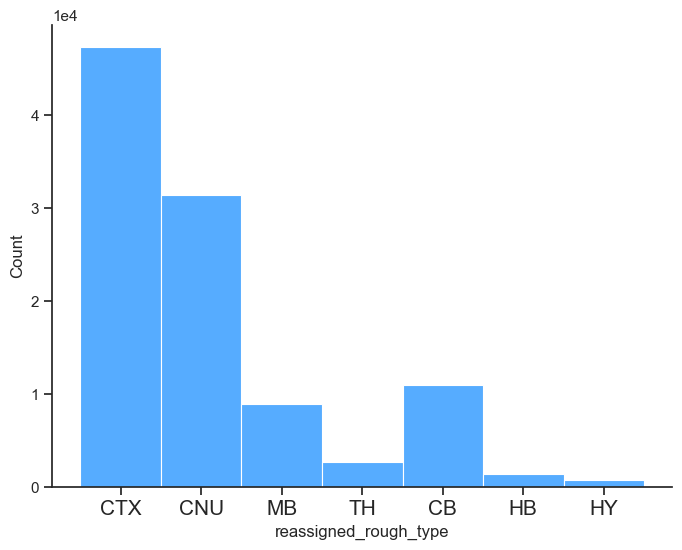

In [304]:
sns.set_theme(style="ticks")
f,ax = plt.subplots(figsize=(8,6))
sns.despine(f)
sns.histplot(celltype_Ftable_selected, x="reassigned_rough_type",color="dodgerblue",linewidth=.8)
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([x for x in ax.get_xticklabels()],fontsize=15)
plt.savefig('figs/distribution_rough_brains.png',dpi=100)

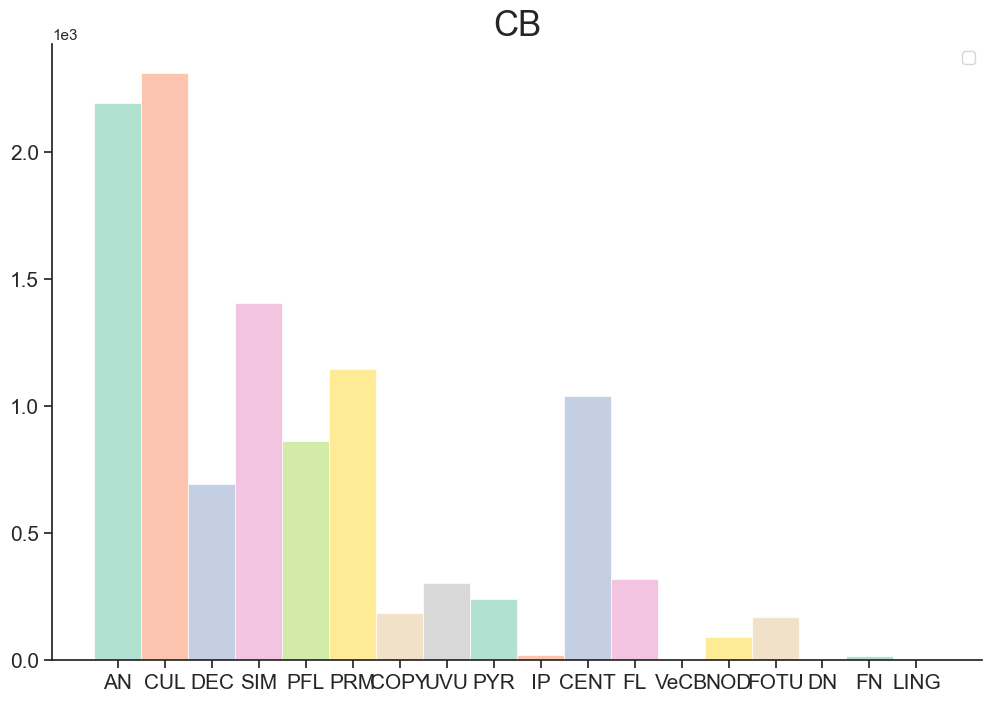

In [305]:
i=0
f,ax = plt.subplots(figsize=(12,8))
sns.despine(f)
data = celltype_Ftable_selected[celltype_Ftable_selected['reassigned_rough_type']==unique_rough[i]]
sns.histplot(data, x="reassigned_type",hue="reassigned_type",palette="Set2",linewidth=.5)
plt.legend(labels=[])
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
xTick=[]
xLabel=[]
for j in range(len(ax.get_xticklabels())):
    l = ax.get_xticklabels()[j].get_text()
    n = ct[l]
    xTick.append(j)
    xLabel.append(l)
ax.set_xticks(xTick)
ax.set_xticklabels(xLabel,fontsize=15)
ax.tick_params(axis='y',labelsize=15)
plt.title(unique_rough[i],fontsize=25)
plt.ylabel('')
plt.xlabel('')
plt.savefig(f'figs/{unique_rough[i]}_count.png',dpi=100,bbox_inches='tight')

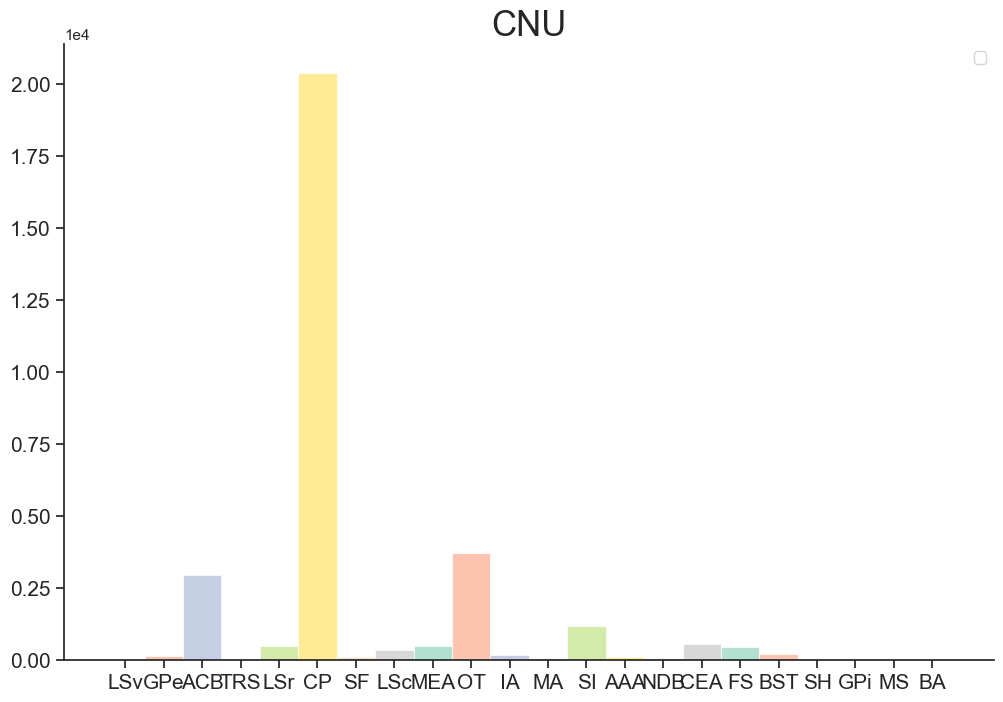

In [306]:
i=1
f,ax = plt.subplots(figsize=(12,8))
sns.despine(f)
data = celltype_Ftable_selected[celltype_Ftable_selected['reassigned_rough_type']==unique_rough[i]]
sns.histplot(data, x="reassigned_type",hue="reassigned_type",palette="Set2",linewidth=.5)
plt.legend(labels=[])
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
xTick=[]
xLabel=[]
for j in range(len(ax.get_xticklabels())):
    l = ax.get_xticklabels()[j].get_text()
    n = ct[l]
    xTick.append(j)
    xLabel.append(l)
ax.set_xticks(xTick)
ax.set_xticklabels(xLabel,fontsize=15)
ax.tick_params(axis='y',labelsize=15)
plt.title(unique_rough[i],fontsize=25)
plt.ylabel('')
plt.xlabel('')
plt.savefig(f'figs/{unique_rough[i]}_count.png',dpi=100,bbox_inches='tight')

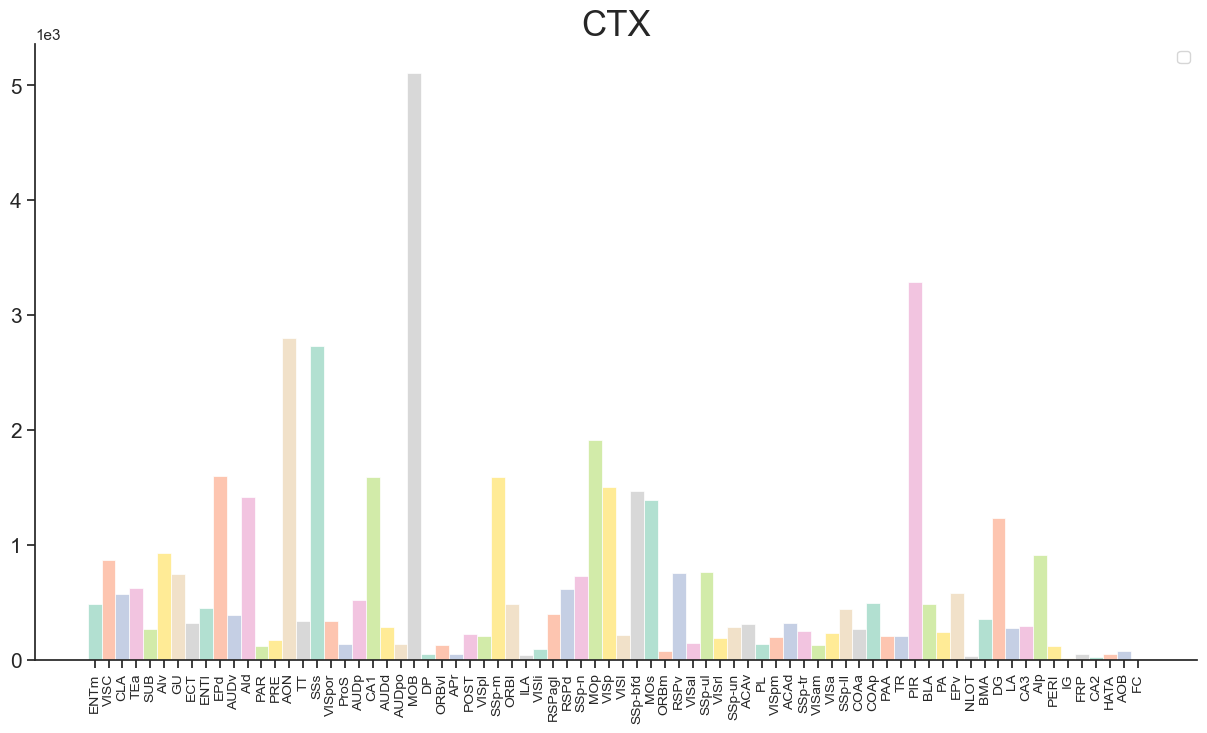

In [307]:
i=2
f,ax = plt.subplots(figsize=(15,8))
sns.despine(f)
data = celltype_Ftable_selected[celltype_Ftable_selected['reassigned_rough_type']==unique_rough[i]]
sns.histplot(data, x="reassigned_type",hue="reassigned_type",palette="Set2",linewidth=.5)
plt.legend(labels=[])
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
xTick=[]
xLabel=[]
for j in range(len(ax.get_xticklabels())):
    l = ax.get_xticklabels()[j].get_text()
    n = ct[l]
    xTick.append(j)
    xLabel.append(l)
ax.set_xticks(xTick)
ax.set_xticklabels(xLabel,rotation=90,fontsize=10)
ax.tick_params(axis='y',labelsize=15)
plt.title(unique_rough[i],fontsize=25)
plt.ylabel('')
plt.xlabel('')
plt.savefig(f'figs/{unique_rough[i]}_count.png',dpi=100,bbox_inches='tight')

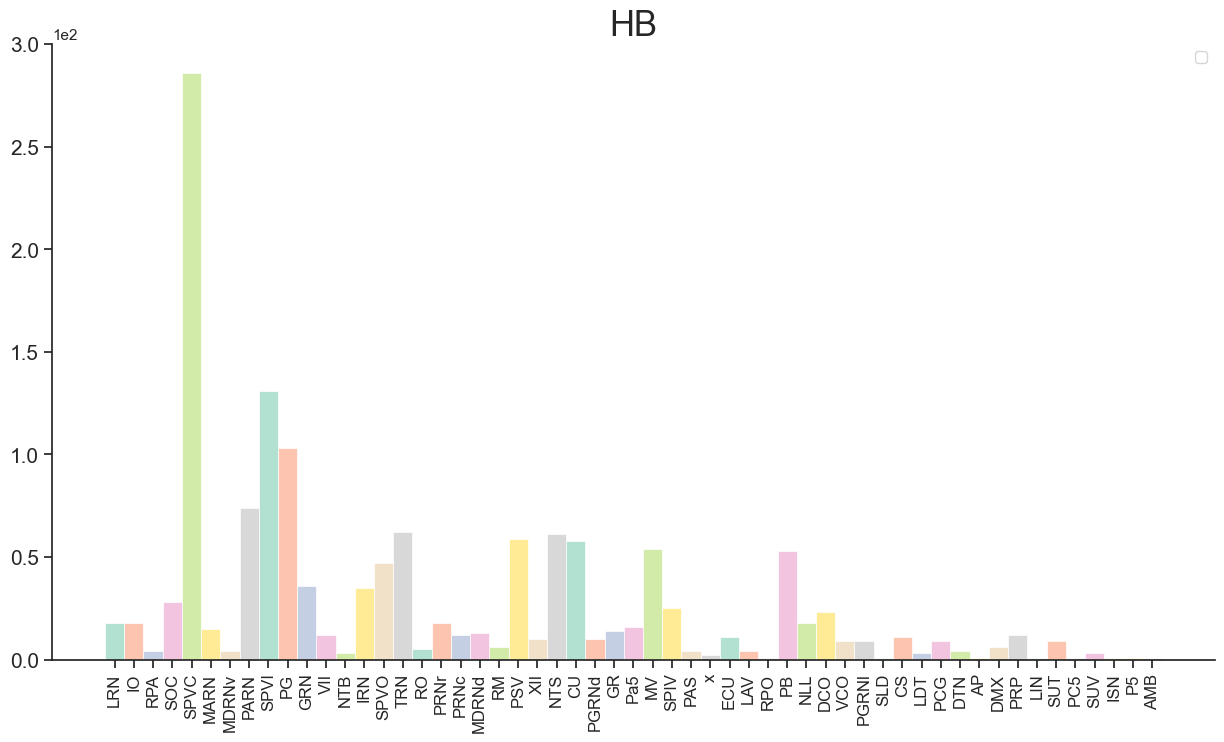

In [297]:
i=3
f,ax = plt.subplots(figsize=(15,8))
sns.despine(f)
data = celltype_Ftable_selected[celltype_Ftable_selected['reassigned_rough_type']==unique_rough[i]]
sns.histplot(data, x="reassigned_type",hue="reassigned_type",palette="Set2",linewidth=.5)
plt.legend(labels=[])
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
xTick=[]
xLabel=[]
for j in range(len(ax.get_xticklabels())):
    l = ax.get_xticklabels()[j].get_text()
    n = ct[l]
    xTick.append(j)
    xLabel.append(l)
ax.set_xticks(xTick)
ax.set_xticklabels(xLabel,rotation=90, fontsize=12)
ax.tick_params(axis='y',labelsize=15)
plt.title(unique_rough[i],fontsize=25)
plt.ylabel('')
plt.xlabel('')
plt.savefig(f'figs/{unique_rough[i]}_count.png',dpi=100,bbox_inches='tight')

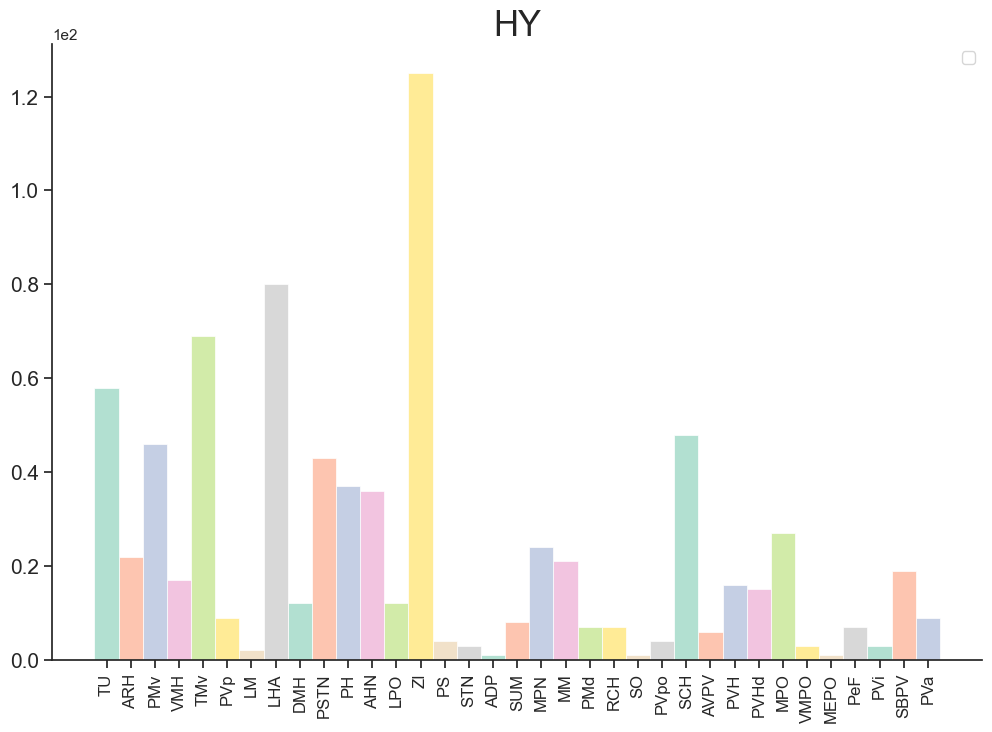

In [299]:
i=4
f,ax = plt.subplots(figsize=(12,8))
sns.despine(f)
data = celltype_Ftable_selected[celltype_Ftable_selected['reassigned_rough_type']==unique_rough[i]]
sns.histplot(data, x="reassigned_type",hue="reassigned_type",palette="Set2",linewidth=.5)
plt.legend(labels=[])
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
xTick=[]
xLabel=[]
for j in range(len(ax.get_xticklabels())):
    l = ax.get_xticklabels()[j].get_text()
    n = ct[l]
    xTick.append(j)
    xLabel.append(l)
ax.set_xticks(xTick)
ax.set_xticklabels(xLabel,rotation=90,fontsize=12)
ax.tick_params(axis='y',labelsize=15)
plt.title(unique_rough[i],fontsize=25)
plt.ylabel('')
plt.xlabel('')
plt.savefig(f'figs/{unique_rough[i]}_count.png',dpi=100,bbox_inches='tight')

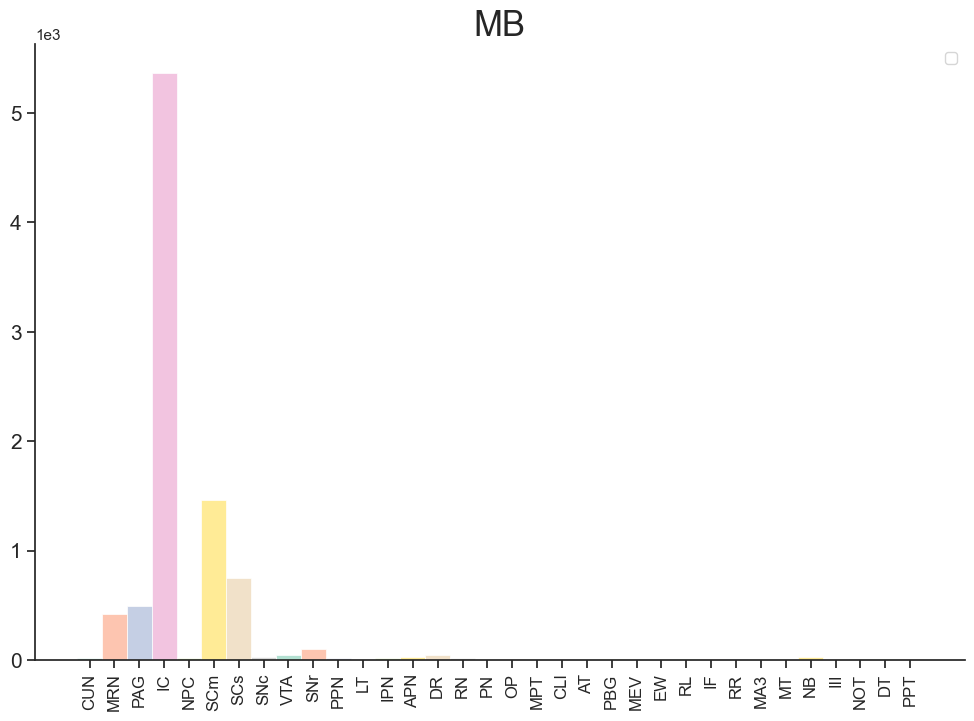

In [301]:
i=5
f,ax = plt.subplots(figsize=(12,8))
sns.despine(f)
data = celltype_Ftable_selected[celltype_Ftable_selected['reassigned_rough_type']==unique_rough[i]]
sns.histplot(data, x="reassigned_type",hue="reassigned_type",palette="Set2",linewidth=.5)
plt.legend(labels=[])
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
xTick=[]
xLabel=[]
for j in range(len(ax.get_xticklabels())):
    l = ax.get_xticklabels()[j].get_text()
    n = ct[l]
    xTick.append(j)
    xLabel.append(l)
ax.set_xticks(xTick)
ax.set_xticklabels(xLabel,rotation=90,fontsize=12)
ax.tick_params(axis='y',labelsize=15)
plt.title(unique_rough[i],fontsize=25)
plt.ylabel('')
plt.xlabel('')
plt.savefig(f'figs/{unique_rough[i]}_count.png',dpi=100,bbox_inches='tight')

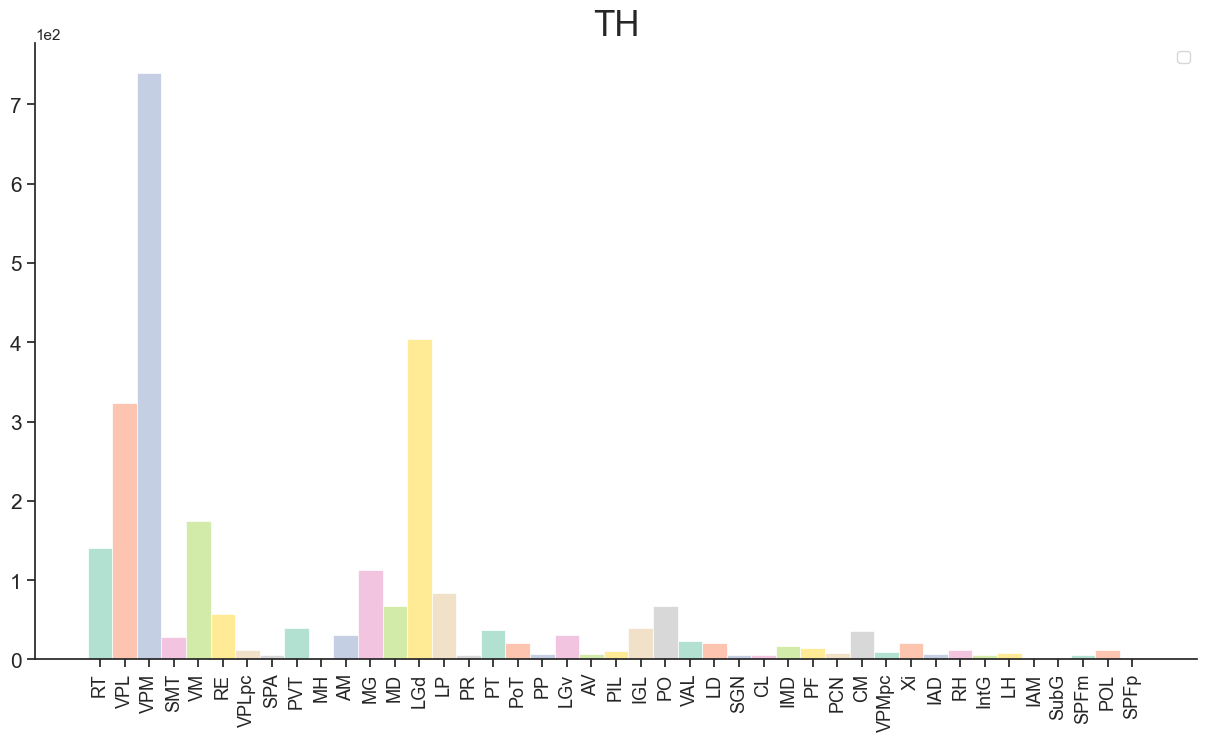

In [303]:
i=6
f,ax = plt.subplots(figsize=(15,8))
sns.despine(f)
data = celltype_Ftable_selected[celltype_Ftable_selected['reassigned_rough_type']==unique_rough[i]]
sns.histplot(data, x="reassigned_type",hue="reassigned_type",palette="Set2",linewidth=.5)
plt.legend(labels=[])
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
xTick=[]
xLabel=[]
for j in range(len(ax.get_xticklabels())):
    l = ax.get_xticklabels()[j].get_text()
    n = ct[l]
    xTick.append(j)
    xLabel.append(l)
ax.set_xticks(xTick)
ax.set_xticklabels(xLabel,rotation=90,fontsize=13)
ax.tick_params(axis='y',labelsize=15)
plt.title(unique_rough[i],fontsize=25)
plt.ylabel('')
plt.xlabel('')
plt.savefig(f'figs/{unique_rough[i]}_count.png',dpi=100,bbox_inches='tight')

In [308]:
rest_regions = list(bRegion_count_df[bRegion_count_df['Count']>30]['Brain region'])

In [309]:
len(rest_regions)

149

In [432]:
## somalist filtered 
soma_info = pd.read_csv('179k_somalist.txt',sep=' ',header=None)
soma_info.columns = ['name','x','y','z']
soma_info

,name,x,y,z
0,10001_19868_8155_stps,11287.600,3667.825,5563.125
1,10008_10862_6996_stps,9625.025,3764.025,9017.726
2,10012_10978_7039_stps,9682.675,3754.125,8985.000
3,10020_17924_8129_stps,11267.750,3630.950,6364.775
4,10028_28224_6732_stps,9298.925,3983.150,2374.200
...,...,...,...,...
179563,7626_18076_3068_stps,3998.550,1907.975,5585.175
179564,8122_17844_3762_stps,4842.475,2017.425,5512.275
179565,8813_17916_4826_stps,5990.175,2143.925,5498.300
179566,9571_7846_6146_stps,7425.875,3166.825,1794.700


In [433]:
soma_info['name'] = soma_info['name'].map(lambda x:x.split("_stps")[0])

In [434]:
filtered_swc_name = list(map(lambda x:x.split('_stps')[0],filtered_swc_list))

In [438]:
soma_info_filtered = soma_info[soma_info['name'].isin(filtered_swc_name)]
soma_info_filtered2 = soma_info_filtered.copy()
soma_info_filtered2['x'] = soma_info_filtered2['x']
soma_info_filtered2['y'] = soma_info_filtered2['y']
soma_info_filtered2['z'] = soma_info_filtered2['z']
soma_info_filtered2.to_csv('filtered_soma_info_25.txt',sep=' ',index=None)

In [437]:
len(soma_info_filtered2)

103704

## Preprocess

#### top 5 dendrites for each

In [48]:
from scipy.spatial import distance,distance_matrix

In [66]:
### soma XYZ for each dendrite
in_dir = "179k_multibranch_final/*"
folders = glob.glob(in_dir)
swclist = []
for folder in folders:
    files = glob.glob(folder+"/*")
    swclist = swclist+files

In [91]:
tablelist = [[],[],[],[]]
for sf in swclist:
    swc = pd.read_csv(sf,sep = " ",comment="#",usecols =[0,1,2,3,4,5,6],header=None)
    swc.columns = ['#n','type','x','y','z','r','pid']
    soma_id = swc[(swc['pid']== -1)&(swc['type'] == 1)].index[0]
    neuron_name = os.path.basename(sf).split("_stps")[0]
    soma_XYZ = swc.iloc[soma_id][['x','y','z']]
    tablelist[0].append(neuron_name)
    tablelist[1].append(soma_XYZ[0])
    tablelist[2].append(soma_XYZ[1])
    tablelist[3].append(soma_XYZ[2])

In [93]:
somaList = pd.DataFrame({'name':tablelist[0],'x':tablelist[1],'y':tablelist[2],'z':tablelist[3]})

In [186]:
somaList.to_csv('somalist_179k.csv',index=None)

In [132]:
soma_coords = somaList[['x','y','z']].values
neighbor_localList = [[],[],[],[],[]]
for i in range(len(soma_coords)):
    d = distance_matrix(soma_coords,np.array([soma_coords[i,:]]))
    sorted_d = sorted(d[:,0])
    for j in range(5):
        org_id = d[:,0].tolist().index(sorted_d[j])
        neighbor_localList[j].append(somaList.iloc[org_id]['name'])

KeyboardInterrupt: 

0         10001_19868_8155
1         10008_10862_6996
2         10012_10978_7039
3         10020_17924_8129
4         10028_28224_6732
                ...       
179563     7626_18076_3068
179564     8122_17844_3762
179565     8813_17916_4826
179566      9571_7846_6146
179567      9854_7212_6231
Name: name, Length: 179568, dtype: object

In [106]:
soma_coords.shape

(179568, 3)

In [121]:
np.array([soma_coords[i,:]])

array([[11287.6  ,  3667.825,  5563.125]])

In [120]:
in_dir="/home/penglab/Desktop/MyFiles/Projects/1891_retype/modified_47_retype/*"
tmp_files = glob.glob(in_dir)

In [102]:
out_folder="/home/penglab/Desktop/MyFiles/Projects/1891_retype/recheck2"
in_folder="/home/penglab/Desktop/MyFiles/Projects/1891_retype/All1891"

In [94]:
import shutil

In [121]:
n=0
for f in tmp_files:
    swc = pd.read_csv(f,comment="#",header=None,sep=' ')
    swc.columns=['n','type','x','y','z','r','p']
    n_axon = len(swc[swc['type']==2])
    n_basal = len(swc[swc['type']==3])
    n_apical = len(swc[swc['type']==4])
    if((n_axon<n_basal)|(n_axon<n_apical)):
        # f_name = os.path.basename(f)
        # in_path = os.path.join(in_folder,f_name)
        # out_path = os.path.join(out_folder,f_name)
        #shutil.copy(in_path,out_path)
        n=n+1
        print(f)

/home/penglab/Desktop/MyFiles/Projects/1891_retype/modified_47_retype/17109_2401_x9954_y9122_stamp_2023_11_22_10_13.ano.eswc
/home/penglab/Desktop/MyFiles/Projects/1891_retype/modified_47_retype/18867_4392_x7633_y13301.ano.eswc
/home/penglab/Desktop/MyFiles/Projects/1891_retype/modified_47_retype/18867_4954_x9860_y7599_stamp_2023_11_20_18_06.ano.eswc


In [104]:
n

31

In [123]:
t1=os.listdir("/home/penglab/Desktop/MyFiles/Projects/1891_retype/modified_47_retype")
t2=os.listdir("/home/penglab/Desktop/MyFiles/Projects/1891_retype/modified_25+22")
set(t2)-set(t1)

{'17109_2601_x9498_y8169.swc',
 '18867_4647_x12409_y6656.ano.eswc',
 '18868_3627_x28035_y8749.ano.eswc'}

In [132]:
name_folder = "/home/penglab/Desktop/MyFiles/Projects/1891_retype/test/*"
files = glob.glob(name_folder)

In [133]:
for f in files:
    f_name = os.path.basename(f)
    if "_stamp" in f_name:
        name = f_name.split("_stamp")[0]+".swc"
        dir_name = os.path.dirname(f)
        f_path = os.path.join(dir_name,name)
        os.rename(f,f_path)
    elif "ano" in f_name:
        name = f_name.split(".ano")[0]+".swc"
        dir_name = os.path.dirname(f)
        f_path = os.path.join(dir_name,name)
        os.rename(f,f_path)
    else:
        continue

### crop size calculation

In [192]:
brain_img_info = pd.read_csv("all_brain_metainfo.csv")
# brain_ids = []
# in_dir = "179k_CCFv3_25um_tosoma_100um"
# for b in os.listdir(in_dir):
#     brain_ids.append(int(b))

In [199]:
brain_ids = [int(x) for x in brain_list]

In [198]:
min_resx = brain_img_info[brain_img_info['brainid'].isin(brain_ids)]['resx'].min()
min_resy = brain_img_info[brain_img_info['brainid'].isin(brain_ids)]['resy'].min()
min_resz = brain_img_info[brain_img_info['brainid'].isin(brain_ids)]['resz'].min()

In [200]:
min_resx

0.2

In [14]:
1024*min_resx,1024*min_resy,256*min_resz

(204.8, 204.8, 256)

### Matching 1891

In [192]:
def read_apo(folder_path):
    apo_files = glob.glob(folder_path+"/*")
    apo_table = pd.read_csv(apo_files[0])
    for i in range(1, len(apo_files)):
        in_file = pd.read_csv(apo_files[i])
        apo_table = pd.concat([apo_table,in_file])
    apo_table = apo_table.reset_index(drop=True)
    apo_table = apo_table[['name','x','y','z']]
    return apo_table

In [193]:
def soma_matching(subject_table,object_table):
    matched_ids = []
    sub_ids = []
    for i in range(len(subject_table)):
        s = subject_table[['x','y','z']].iloc[i].values.reshape(1,3)
        d_matrix = distance_matrix(s,object_table[['x','y','z']].values)
        min_d = np.min(d_matrix)
        if min_d > 30:
            continue
        index = np.argwhere(d_matrix == min_d)[0][1]
        matched_ids.append(object_table['name'].iloc[index].split(".swc")[0])
        sub_ids.append(subject_table['name'].iloc[i])
    return sub_ids, matched_ids

In [196]:
### 1891 soma match
folder_subject = "1891_apo"
apo_subject_table = read_apo(folder_subject)
apo_subject_table['name'] = apo_subject_table['name'].map(lambda x:x.lstrip())
apo_subject_table = apo_subject_table[~apo_subject_table['name'].isin(del_list)]
apo_subject_table = apo_subject_table.reset_index(drop=True)

In [197]:
folder_obj = "179k_somalist_raw"
apo_obj_table = read_apo(folder_obj)

In [198]:
subj_ids, matched_ids_obj = soma_matching(apo_subject_table,apo_obj_table)

In [202]:
matched_ids_obj = list(map(lambda x: x.lstrip(),matched_ids_obj))

In [203]:
out_match_table = pd.DataFrame({'s_name':subj_ids,'o_name':matched_ids_obj})
out_match_table.to_csv('so_match_table.txt', index=None, sep = ' ')

In [209]:
matched_sub_gf = gf_table[gf_table['Name'].isin(subj_ids)]
matched_obj_gf = Ftable[Ftable['Name'].isin(matched_ids_obj)]

In [210]:
len(matched_obj_gf)

1505

In [169]:
matched_sub_gf = pd.DataFrame()
for i in subj_ids:
    row = gf_table[gf_table['Name']==i]
    matched_sub_gf = pd.concat([matched_sub_gf,row])
matched_sub_gf.columns = gf_table.columns
matched_sub_gf = matched_sub_gf.reset_index(drop=True)

In [212]:
matched_obj_gf = pd.DataFrame()
for i in matched_ids_obj:
    row = Ftable[Ftable['Name']==i]
    matched_obj_gf = pd.concat([matched_obj_gf,row])
matched_obj_gf.columns = Ftable.columns
matched_obj_gf = matched_obj_gf.reset_index(drop=True)

In [213]:
matched_sub_gf2 = matched_sub_gf.drop(['Name'],axis=1)
matched_obj_gf2 = matched_obj_gf.drop(['Name'],axis=1)

In [214]:
matched_sub_gf2 = matched_sub_gf2.reset_index(drop=True)
matched_obj_gf2 = matched_obj_gf2.reset_index(drop=True)

In [215]:
from scipy import stats
from scipy.stats import pearsonr,spearmanr
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
matched_sub_gf3 = matched_sub_gf2[['Bifurcations', 'Branches', 'Tips',
                                'Length','MaxEuclideanDistance','MaxPathDistance', 'MaxBranchOrder', 'AverageContraction',
                                'AverageParent-daughterRatio','AverageBifurcationAngleLocal', 'AverageBifurcationAngleRemote',
                                'HausdorffDimension']]
matched_obj_gf3 = matched_obj_gf2[['Bifurcations', 'Branches', 'Tips',
                                'Length','MaxEuclideanDistance','MaxPathDistance', 'MaxBranchOrder', 'AverageContraction',
                                'AverageParent-daughterRatio','AverageBifurcationAngleLocal', 'AverageBifurcationAngleRemote',
                                'HausdorffDimension']]

In [402]:
matched_sub_gf2['AverageParent-daughterRatio'].max()

1

/var/folders/7l/zhd6m6dn33s94rgr0gyffgq40000gn/T/ipykernel_35518/712236704.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = matched_sub_gf2[feature_list[i]], label="1876 dataset",fill=True)


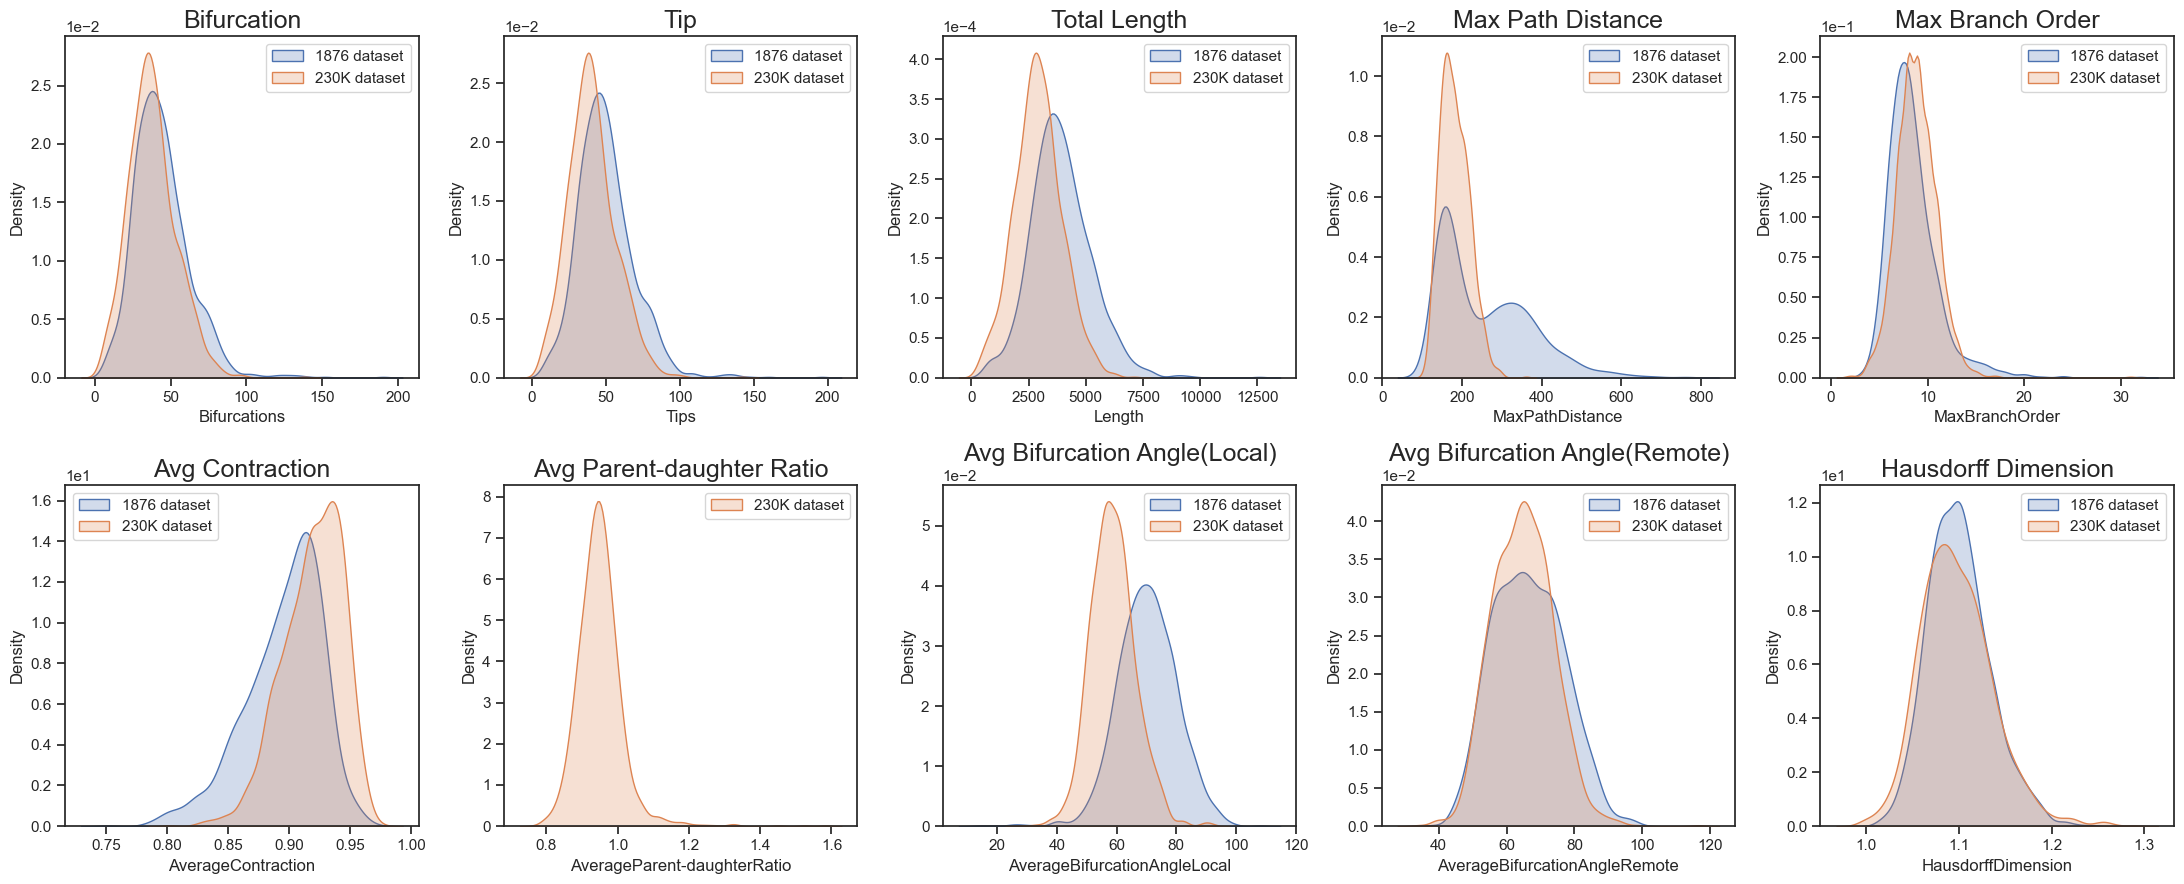

In [218]:
plt.figure(figsize=(22,9))
feature_list = ['Bifurcations','Tips','Length','MaxPathDistance','MaxBranchOrder','AverageContraction',
                'AverageParent-daughterRatio','AverageBifurcationAngleLocal','AverageBifurcationAngleRemote',
               'HausdorffDimension']
feature_name = ['Bifurcation','Tip','Total Length','Max Path Distance','Max Branch Order','Avg Contraction',
               'Avg Parent-daughter Ratio','Avg Bifurcation Angle(Local)','Avg Bifurcation Angle(Remote)',
               'Hausdorff Dimension']
for i in range(len(feature_list)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(data = matched_sub_gf2[feature_list[i]], label="1876 dataset",fill=True)
    sns.kdeplot(data = matched_obj_gf2[feature_list[i]], label="230K dataset",fill=True)
    plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
    plt.title(feature_name[i],fontsize=18)
    if feature_list[i] == 'AverageContraction':
        plt.legend(loc='upper left')
    else:
        plt.legend(loc='upper right')
    plt.tight_layout()
plt.savefig("figs/1891_comparison.png",dpi=100)

In [3]:
comparison_folder = '1891_compare/*'
compared_files = glob.glob(comparison_folder)
comparison_table = pd.DataFrame(columns=['so_structure','os_structure','avg_structure','median_structure','avg_difference','so_percent','os_percent','avg_percent'])
n = 0
for cf in compared_files:
    tmp = pd.read_csv(cf,header=None)
    new_value = []
    for i in range(2,10):
        v = float(tmp[0].iloc[i].split('=')[1])
        new_value.append(v)
    comparison_table.loc[n] = new_value
    n = n+1

In [4]:
match_table = pd.read_csv('so_match_table.txt',sep = ' ')

In [5]:
subj_ids = list(match_table['s_name'])
matched_ids_obj = list(match_table['o_name'])

In [6]:
comparison_table2 = comparison_table.copy()
comparison_table2.insert(0,'1867_ID',subj_ids)
comparison_table2.insert(1,'179k_ID',matched_ids_obj)
#comparison_table2.to_csv('neuron_dist_1876.csv',index=None)

In [7]:
brain_info1 = '/Users/krystal/Desktop/project/all_brain_metainfo.csv'
brain_info2 = '/Users/krystal/Desktop/project/cloud_paper/SEU-ALLEN_brains_0422.xlsx'
res_table1 = pd.read_csv(brain_info1)
res_table2 = pd.read_excel(brain_info2)

In [8]:
res_table2['fMOST ID']=res_table2['fMOST ID'].fillna(0)
res_table2['fMOST ID'] = res_table2['fMOST ID'].astype('int')

In [9]:
str(res_table2['Resolution_XY (𝜇𝑚)'].iloc[0]) == 'nan'

True

In [10]:
brainList1 = list(res_table1['brainid'])
brainList2 = list(res_table2['fMOST ID'])

In [11]:
D = []
for i in range(len(comparison_table2)):
    brainID = comparison_table2['1867_ID'][i].split("_")[0]
    if brainID == 'pre':
        brainID = int(comparison_table2['1867_ID'][i].split("_")[1])
    else:
        brainID = int(brainID)
    if brainID in brainList1:
        row_id = res_table1[res_table1['brainid']==brainID].index[0]
        R = res_table1['resx'][row_id]
    elif brainID in brainList2:
        row_id = res_table2[res_table2['fMOST ID']==brainID].index[0]
        R = res_table2['Resolution_XY (𝜇𝑚)'][row_id]
    if str(R) == 'nan':
        R = 0.3
    tmp = comparison_table2['median_structure'].iloc[i] * R
    D.append(tmp)

In [12]:
comparison_table2['median_structure_trans'] = D

In [13]:
comparison_table2.describe()

,so_structure,os_structure,avg_structure,median_structure,avg_difference,so_percent,os_percent,avg_percent,median_structure_trans
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,32.133308,45.550882,38.842092,25.001571,45.002763,0.707431,0.747159,0.727295,5.845815
std,432.343944,431.709532,431.745873,431.445331,431.622575,0.167067,0.149415,0.147547,99.233237
min,1.593120,1.240520,2.650340,1.177370,3.386530,0.160189,0.135030,0.192955,0.270795
25%,4.607220,9.714710,10.070800,2.490170,13.626400,0.591278,0.646850,0.626879,0.583604
50%,7.657390,21.390500,17.333200,3.072860,23.258500,0.707712,0.755625,0.721679,0.804071
75%,15.823900,39.582600,28.512900,8.228380,36.536700,0.821654,0.851260,0.821458,1.955225
max,14493.300000,14343.300000,14418.300000,14400.800000,14418.300000,1.000000,1.000000,1.000000,3312.184000


In [14]:
np.median(comparison_table2['median_structure_trans'])

0.8040708000000001

/Users/krystal/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


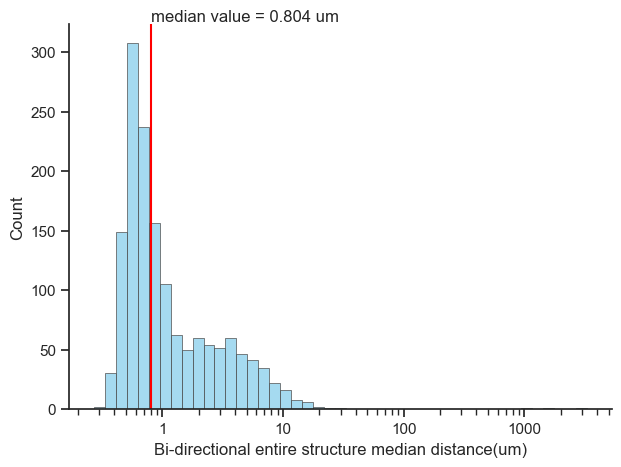

In [19]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    comparison_table2,
    x="median_structure_trans",
    color="skyblue",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.xlabel("Bi-directional entire structure median distance(um)")
ax.axvline(x = 0.804, ymin=0,ymax = 350, label = "median value",color='red',lw=1.5)
ax.text(0.804, ax.get_ylim()[1],'median value = 0.804 um',ha='left',va='bottom')
plt.savefig("figs/median_structure_similarity.png",dpi=100)